# Connect to Kaggle and download data

Kaggle Competition: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install -q kaggle

!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

Save data on drive

In [ ]:
!unzip -q /content/walmart-recruiting-store-sales-forecasting.zip -d /content/drive/MyDrive/Walmart_Recruiting/Data

# Read Data + Data Exploration

In [ ]:
!ls /content/drive/MyDrive/Walmart_Recruiting/Data

features.csv.zip	  stores.csv	train.csv.zip
sampleSubmission.csv.zip  test.csv.zip


In [ ]:
import pandas as pd

In [ ]:
# Train Data:
# Store - the store number
# Dept - the department number
# Date - the week
# Weekly_Sales -  sales for the given department in the given store
# IsHoliday - whether the week is a special holiday week

train_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/train.csv.zip')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train_df.shape

(421570, 5)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
# Test Data:
# Store - the store number
# Dept - the department number
# Date - the week
# IsHoliday - whether the week is a special holiday week

test_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/test.csv.zip')
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test_df.shape

(115064, 4)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [ ]:
# Info about stores
stores_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.shape

(45, 3)

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
# Features data:
# Store - the store number
# Date - the week
# Temperature - average temperature in the region
# Fuel_Price - cost of fuel in the region
# MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
# CPI - the consumer price index
# Unemployment - the unemployment rate
# IsHoliday - whether the week is a special holiday week

features_df = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/features.csv.zip')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Merge stores_df and features_df on 'Store'

In [ ]:
features_stores = features_df.merge(stores_df, how='inner', on = "Store")
features_stores.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
features_stores.shape

(8190, 14)

Merge Train and Test data frames with features and stores data

In [ ]:
train_merged = train_df.merge(features_stores, how='left', on=['Store', 'Date', 'IsHoliday'])
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
train_merged.shape

(421570, 16)

In [ ]:
test_merged = test_df.merge(features_stores, how='left', on=['Store', 'Date', 'IsHoliday'])
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [ ]:
test_merged.shape

(115064, 15)

Covert date to datetime

In [ ]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
test_merged['Date'] = pd.to_datetime(test_merged['Date'])
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [ ]:
train_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
test_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


Train data analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt

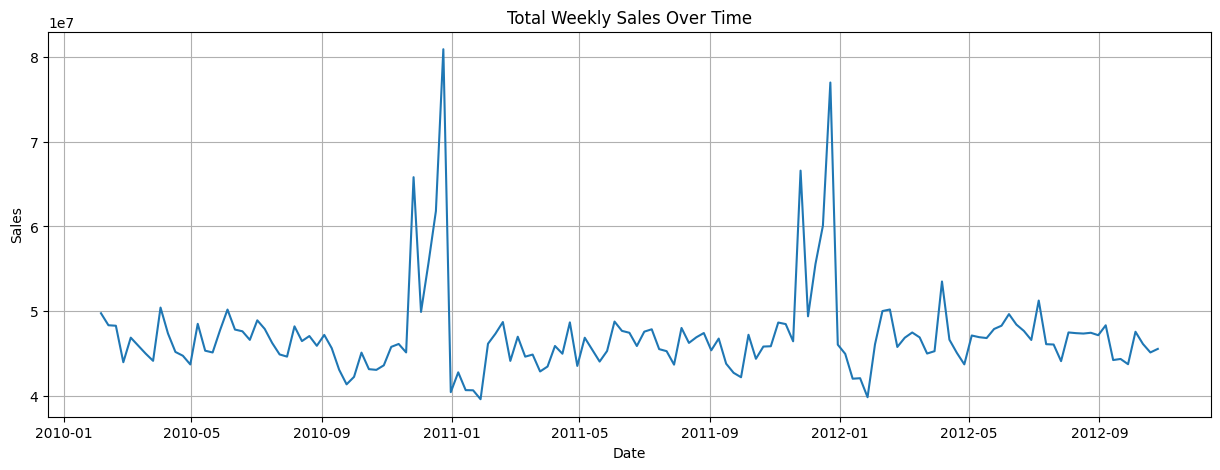

In [ ]:
weekly_sales = train_merged.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(15,5))
plt.plot(weekly_sales)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()


<Axes: title={'center': 'Average Sales per Month'}, xlabel='Month'>

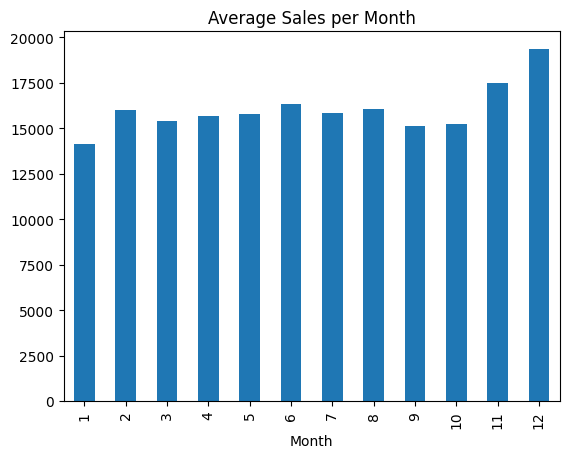

In [ ]:
train_merged['Month'] = train_merged['Date'].dt.month
monthly_sales = train_merged.groupby('Month')['Weekly_Sales'].mean()

monthly_sales.plot(kind='bar', title='Average Sales per Month')

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Sales Comparison on Holiday vs Non-Holiday Weeks')

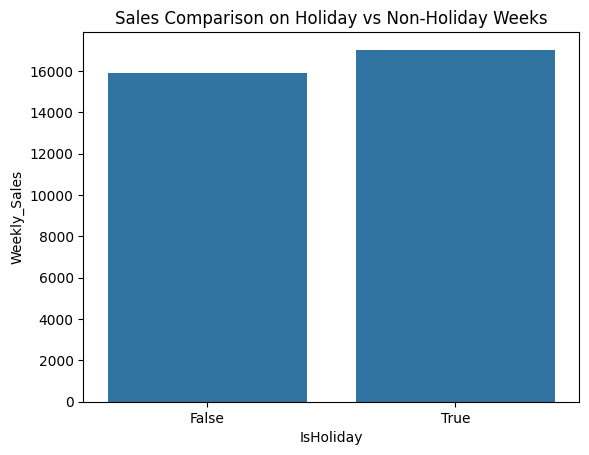

In [ ]:
holiday_sales = train_merged.groupby(['IsHoliday'])['Weekly_Sales'].mean().reset_index()
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales')
plt.title("Sales Comparison on Holiday vs Non-Holiday Weeks")

Feature Engineering

In [ ]:
def create_date_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    return df

In [ ]:
train_merged = create_date_features(train_merged)
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Month,Year,Week,Day,DayOfWeek,IsMonthStart
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,A,151315,2,2010,5,5,4,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,A,151315,2,2010,6,12,4,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,A,151315,2,2010,7,19,4,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,A,151315,2,2010,8,26,4,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,A,151315,3,2010,9,5,4,0


In [ ]:
test_merged = create_date_features(test_merged)
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,Year,Month,Week,Day,DayOfWeek,IsMonthStart
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,223.462779,6.573,A,151315,2012,11,44,2,4,0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,...,223.481307,6.573,A,151315,2012,11,45,9,4,0
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,...,223.512911,6.573,A,151315,2012,11,46,16,4,0
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,...,223.561947,6.573,A,151315,2012,11,47,23,4,0
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,...,223.610984,6.573,A,151315,2012,11,48,30,4,0


In [ ]:
test_merged[['MarkDown1']].isna().sum()

,0
MarkDown1,149


In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

train_merged[markdown_cols].isna().sum()

,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479
MarkDown4,286603
MarkDown5,270138


In [ ]:
(train_merged[markdown_cols].isna().sum() / len(train_merged)) * 100

,0
MarkDown1,64.257181
MarkDown2,73.611025
MarkDown3,67.480845
MarkDown4,67.984676
MarkDown5,64.079038


In [ ]:
train_merged[markdown_cols] = train_merged[markdown_cols].fillna(0)

In [ ]:
test_merged[markdown_cols] = test_merged[markdown_cols].fillna(0)

In [ ]:
train_merged.dtypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_cols = ['IsHoliday', 'Type']
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    train_merged[col] = le.fit_transform(train_merged[col])
    test_merged[col] = le.transform(test_merged[col])
    le_dict[col] = le


In [ ]:
# train_merged.drop(columns=['Date'], inplace=True)
# test_merged.drop(columns=['Date'], inplace=True)

In [ ]:
train_merged.dtypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,int64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


# Time-Series/Seasonal Plots

In [1]:
!pip install -q dagshub "mlflow < 3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

Initialized MLflow to track repo "mrekh21/Walmart_Recruiting"

Repository mrekh21/Walmart_Recruiting initialized!

/tmp/ipython-input-6-1589394585.py:64: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



🏃 View run EDA_Walmart_Sales at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/4/runs/18d495914e274cf59132fd16d3d2280f
🧪 View experiment at: https://dagshub.com/mrekh21/Walmart_Recruiting.mlflow/#/experiments/4


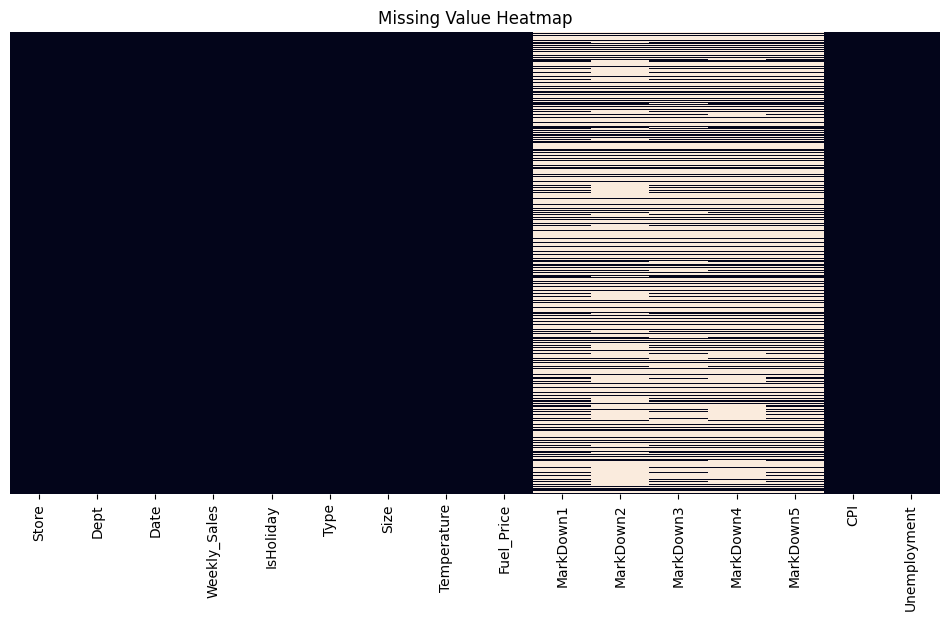

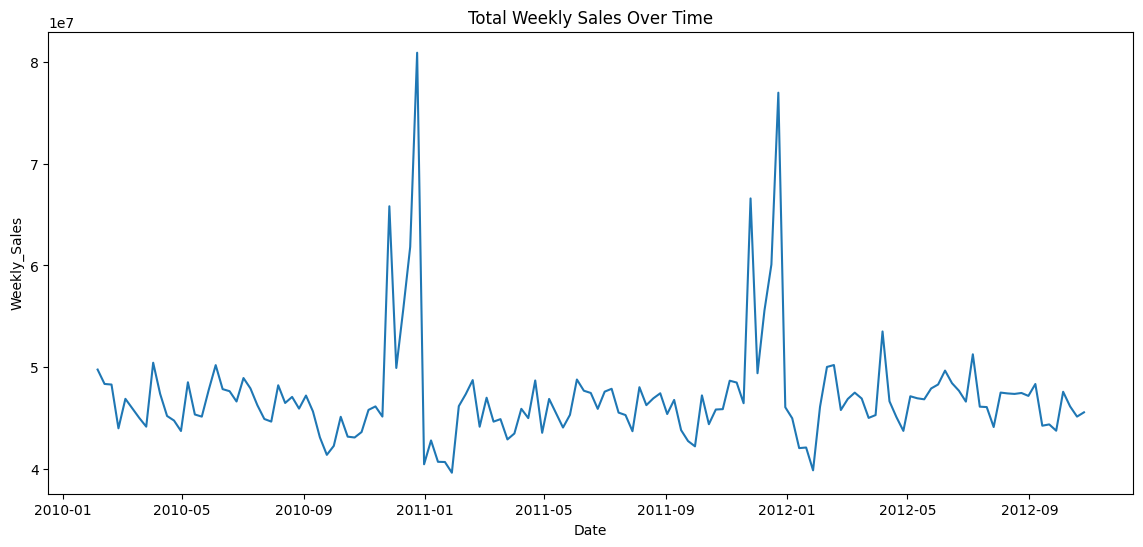

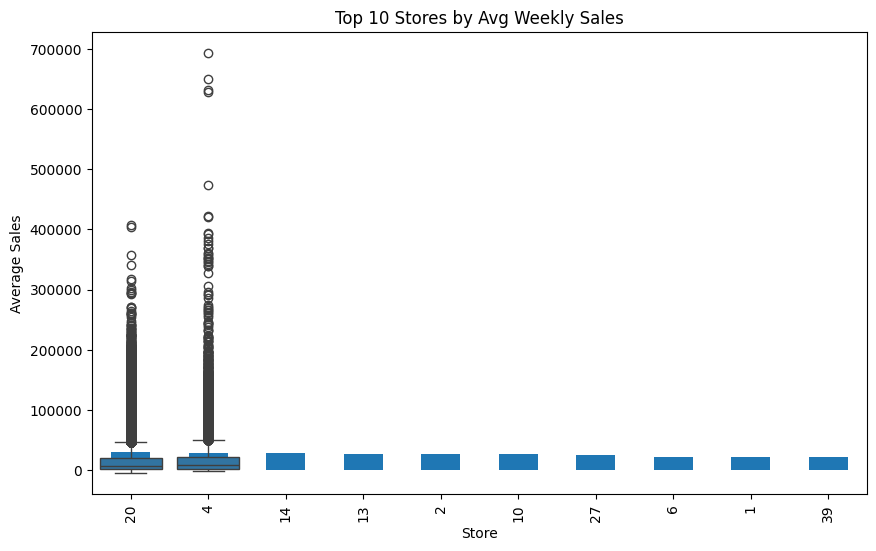

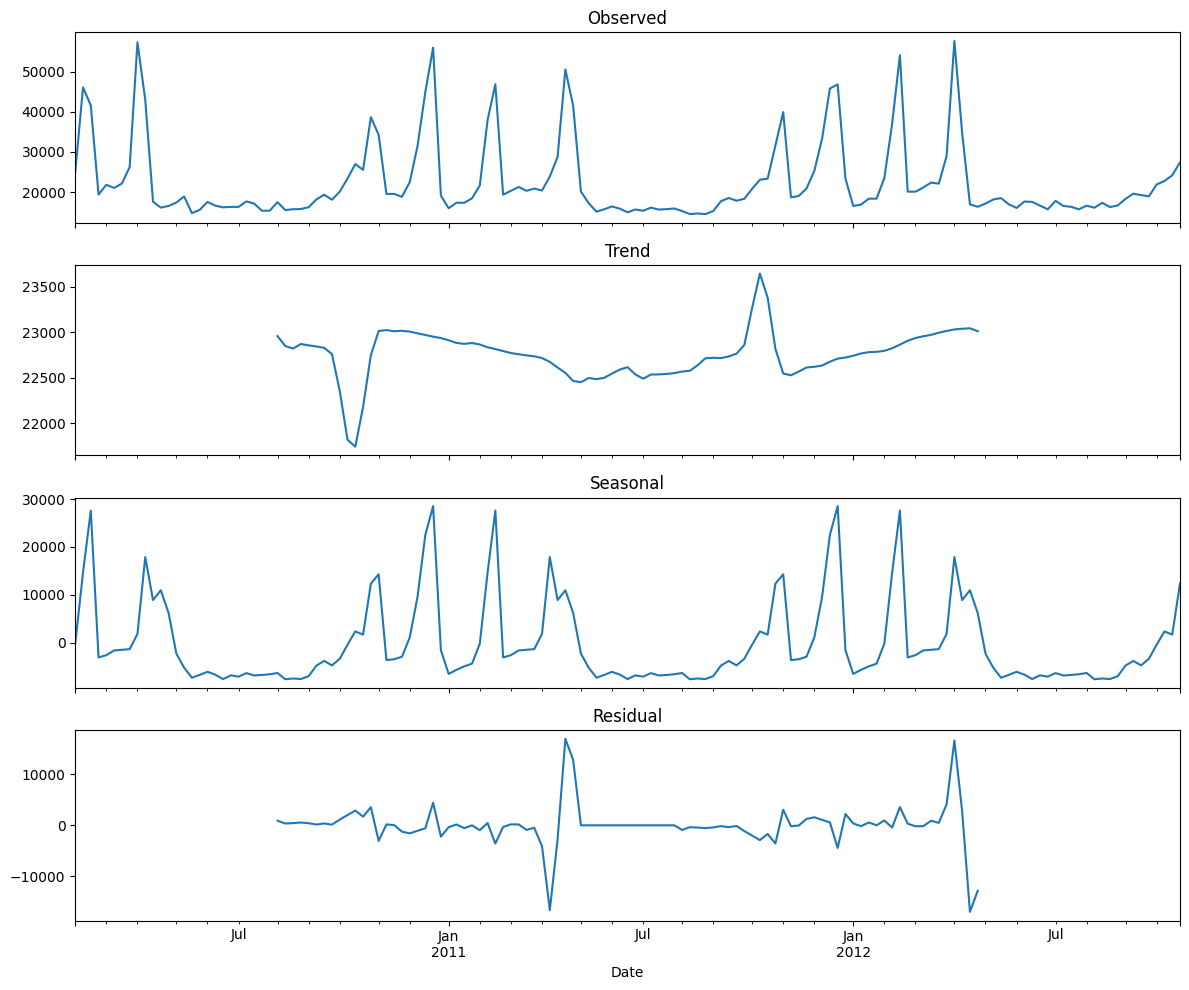

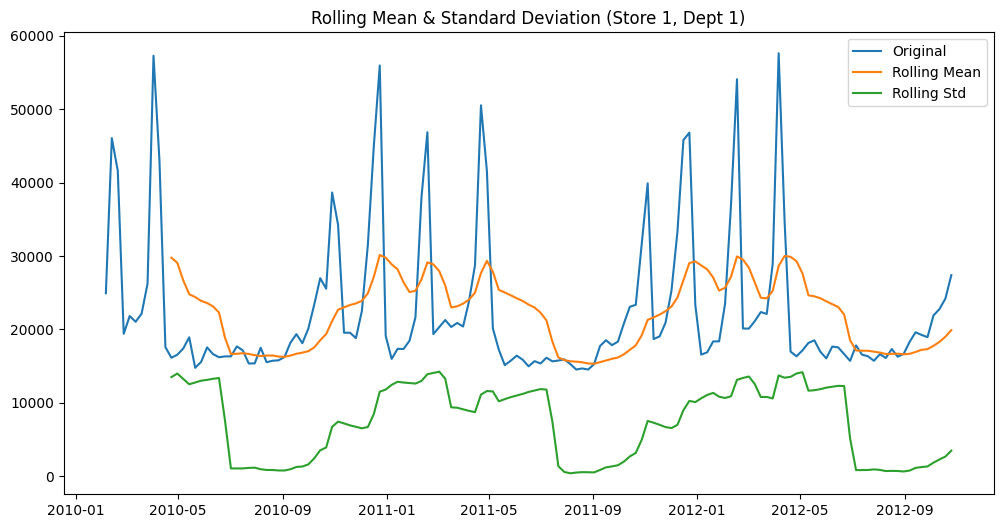

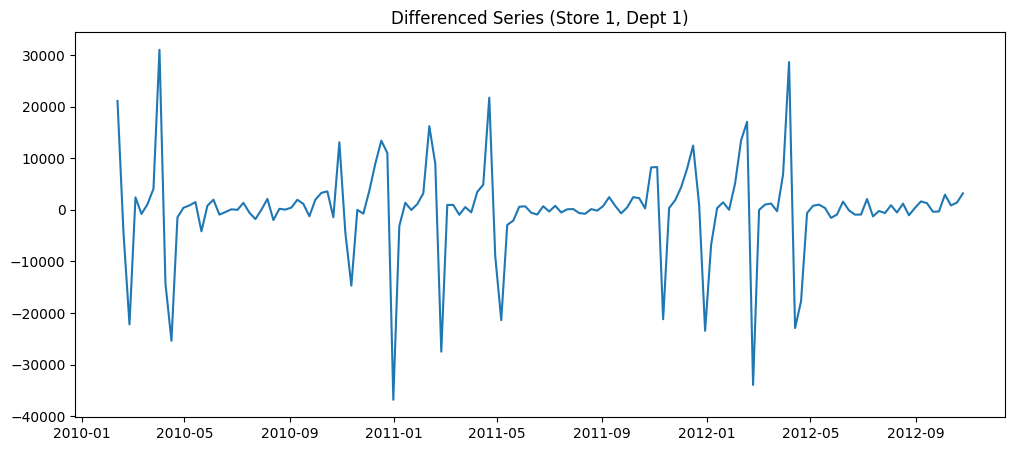

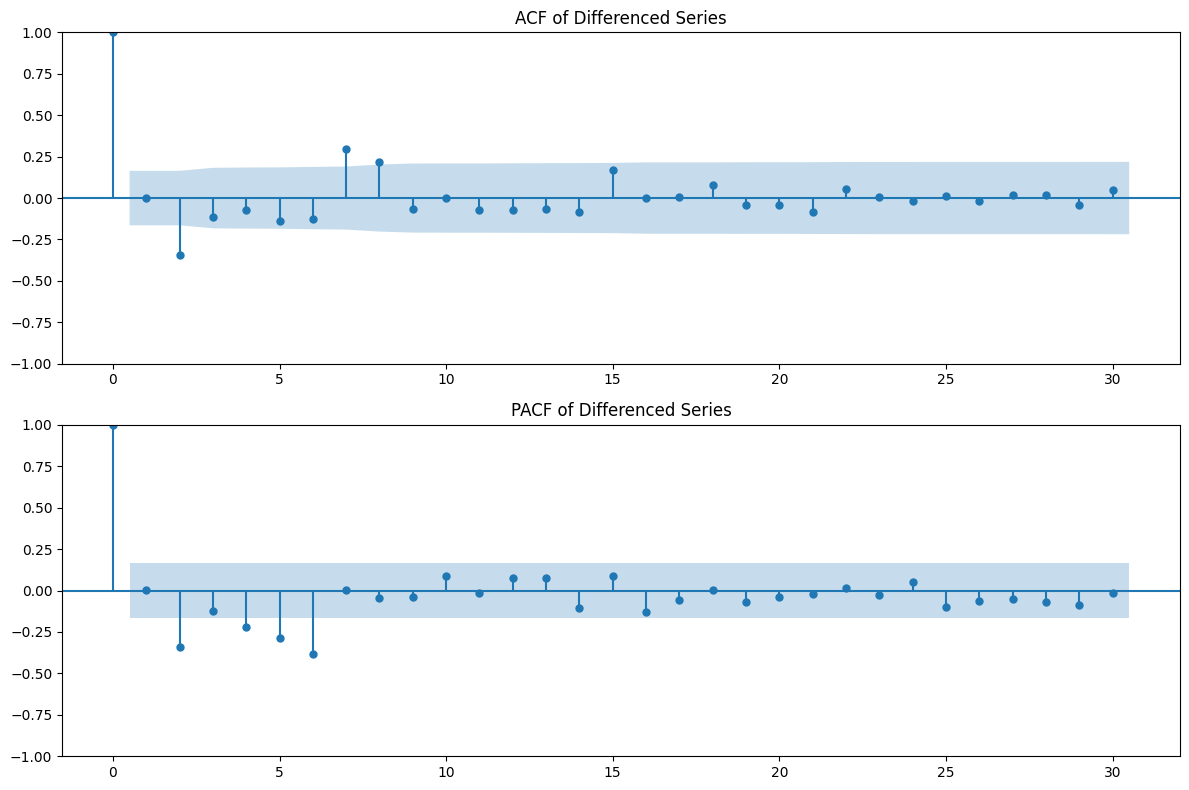

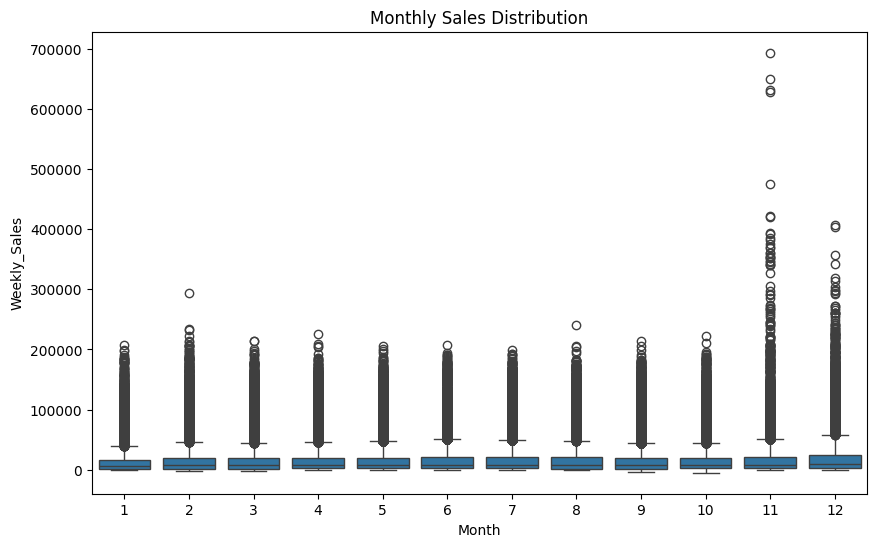

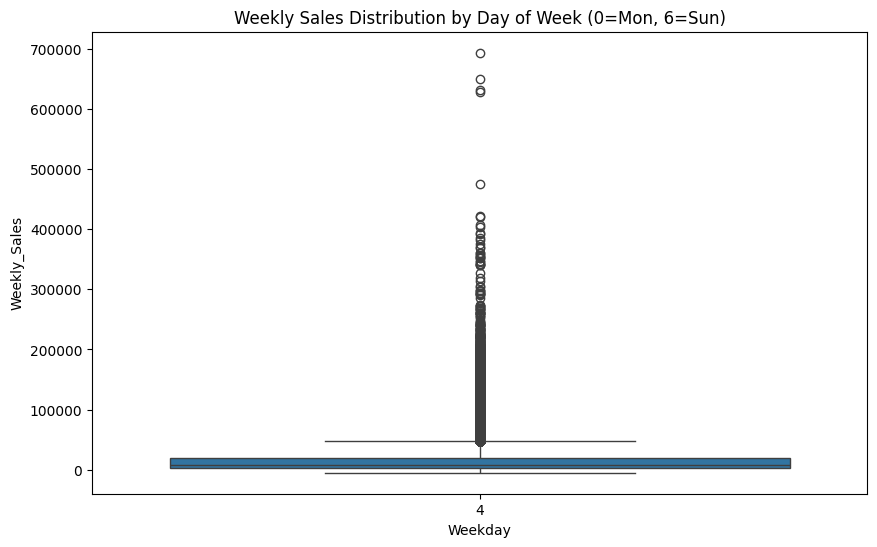

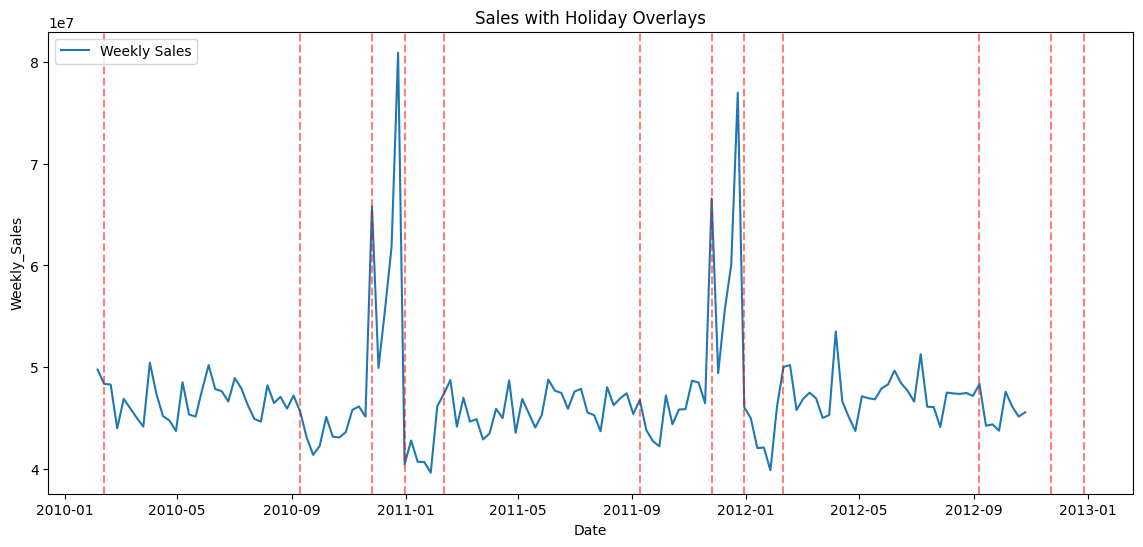

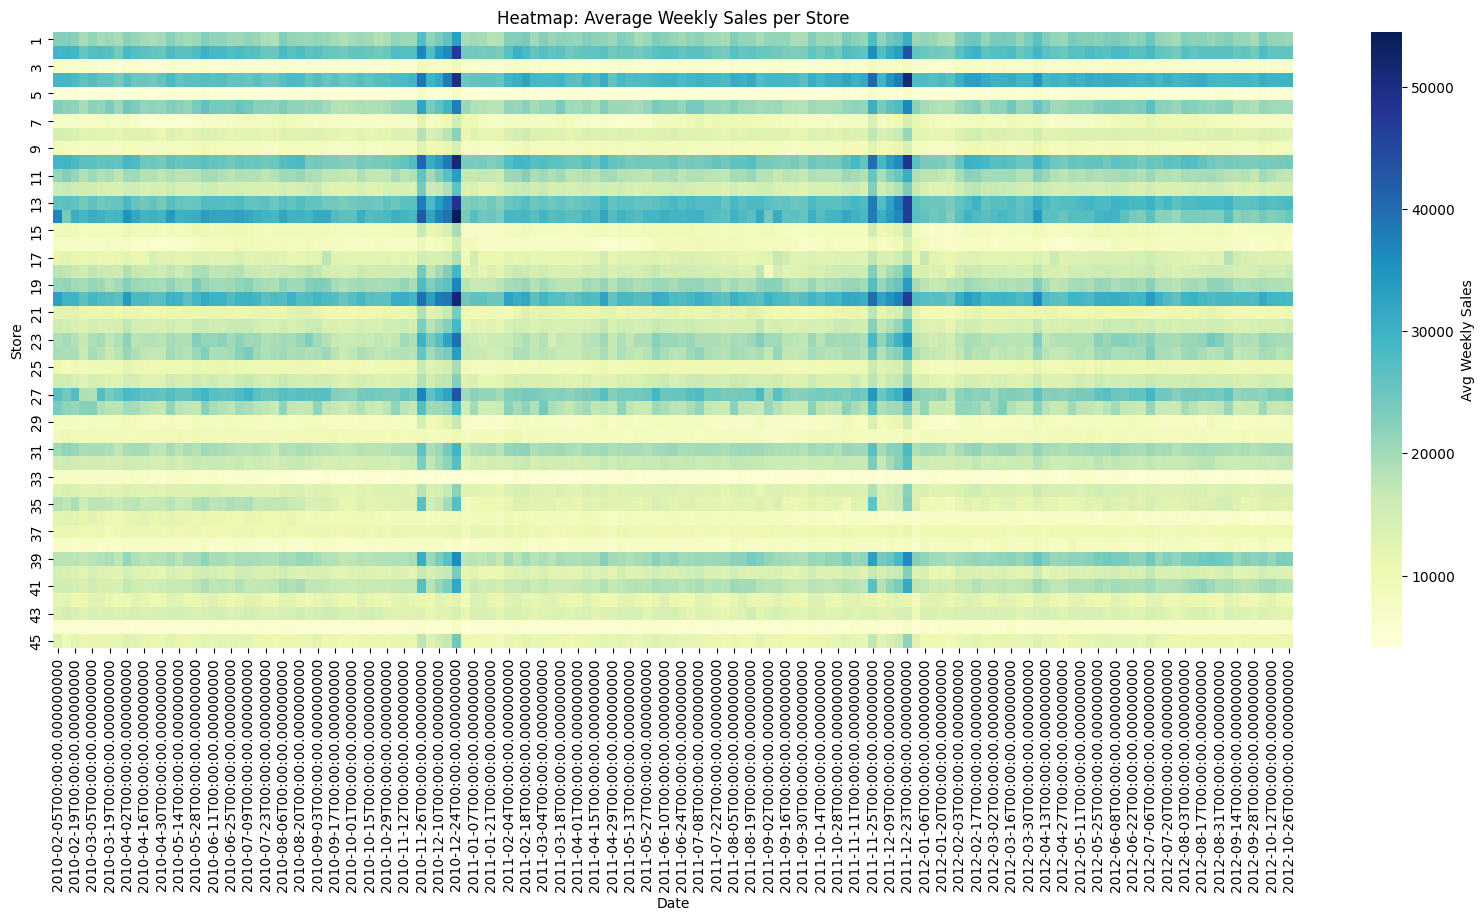

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mlflow
import dagshub
from dagshub import dagshub_logger
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- 1. Setup MLflow with DagsHub ---
dagshub.init(repo_owner='mrekh21', repo_name='Walmart_Recruiting', mlflow=True)
mlflow.set_experiment("Walmart_Sales_Data_Exploration")


# --- 2. Load Data ---
train = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/train.csv.zip', parse_dates=["Date"])
features = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/features.csv.zip', parse_dates=["Date"])
stores = pd.read_csv('/content/drive/MyDrive/Walmart_Recruiting/Data/stores.csv')

# Merge all data
df = train.merge(stores, on='Store', how='left').merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')


# --- 3. Start MLflow Run ---
with mlflow.start_run(run_name="EDA_Walmart_Sales"):

        os.makedirs("plots", exist_ok=True)

        # --- 4. Missing Data Heatmap ---
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title("Missing Value Heatmap")
        plt.savefig("plots/missing_values.png")
        mlflow.log_artifact("plots/missing_values.png", artifact_path="plots")


        # --- 5. Sales Over Time ---
        sales_time = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
        plt.figure(figsize=(14, 6))
        sns.lineplot(x="Date", y="Weekly_Sales", data=sales_time)
        plt.title("Total Weekly Sales Over Time")
        plt.savefig("plots/weekly_sales_trend.png")
        mlflow.log_artifact("plots/weekly_sales_trend.png", artifact_path="plots")


        # --- 6. Holiday vs Non-Holiday Sales ---
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=df)
        plt.title("Sales Distribution: Holiday vs Non-Holiday")
        plt.savefig("plots/holiday_boxplot.png")
        mlflow.log_artifact("plots/holiday_boxplot.png", artifact_path="plots")

        # --- 7. Top 10 Stores by Avg Sales ---
        top_stores = df.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False).head(10)
        top_stores.plot(kind="bar", figsize=(10, 6), title="Top 10 Stores by Avg Weekly Sales")
        plt.ylabel("Average Sales")
        plt.savefig("plots/top_stores.png")
        mlflow.log_artifact("plots/top_stores.png", artifact_path="plots")

        # --- 8. Time-Series Decomposition (Example: Store 1, Dept 1) ---
        sub_df = df[(df["Store"] == 1) & (df["Dept"] == 1)].sort_values("Date")
        ts = sub_df.set_index("Date")["Weekly_Sales"].asfreq("W-FRI").fillna(method="ffill")
        decomposition = seasonal_decompose(ts, model='additive')

        fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
        decomposition.observed.plot(ax=axes[0], title='Observed')
        decomposition.trend.plot(ax=axes[1], title='Trend')
        decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
        decomposition.resid.plot(ax=axes[3], title='Residual')
        plt.tight_layout()
        plt.savefig("plots/decomposition_store1_dept1.png")
        mlflow.log_artifact("plots/decomposition_store1_dept1.png", artifact_path="plots")

        # --- 9. Interactive Plot (Plotly) ---
        fig = px.line(sales_time, x='Date', y='Weekly_Sales', title='Weekly Sales (Interactive)')
        fig.write_html("plots/interactive_sales.html")
        mlflow.log_artifact("plots/interactive_sales.html", artifact_path="plots")

        # --- 10. Rolling Mean and Std ---
        rolling = ts.rolling(window=12)
        plt.figure(figsize=(12, 6))
        plt.plot(ts, label='Original')
        plt.plot(rolling.mean(), label='Rolling Mean')
        plt.plot(rolling.std(), label='Rolling Std')
        plt.legend()
        plt.title("Rolling Mean & Standard Deviation (Store 1, Dept 1)")
        plt.savefig("plots/rolling_mean_std.png")
        mlflow.log_artifact("plots/rolling_mean_std.png", artifact_path="plots")

        # --- 11. Differenced Time-Series ---
        ts_diff = ts.diff().dropna()
        plt.figure(figsize=(12, 5))
        plt.plot(ts_diff)
        plt.title("Differenced Series (Store 1, Dept 1)")
        plt.savefig("plots/differenced_series.png")
        mlflow.log_artifact("plots/differenced_series.png", artifact_path="plots")


        # --- 12. ACF and PACF ---
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        plot_acf(ts_diff, ax=ax[0], lags=30)
        plot_pacf(ts_diff, ax=ax[1], lags=30)
        ax[0].set_title("ACF of Differenced Series")
        ax[1].set_title("PACF of Differenced Series")
        plt.tight_layout()
        plt.savefig("plots/acf_pacf.png")
        mlflow.log_artifact("plots/acf_pacf.png", artifact_path="plots")

        # --- 13. Sales by Month (Boxplot) ---
        df["Month"] = pd.to_datetime(df["Date"]).dt.month
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Month", y="Weekly_Sales", data=df)
        plt.title("Monthly Sales Distribution")
        plt.savefig("plots/monthly_boxplot.png")
        mlflow.log_artifact("plots/monthly_boxplot.png", artifact_path="plots")


        # --- 14. Sales by Day of Week (Boxplot) ---
        df["Weekday"] = pd.to_datetime(df["Date"]).dt.dayofweek
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Weekday", y="Weekly_Sales", data=df)
        plt.title("Weekly Sales Distribution by Day of Week (0=Mon, 6=Sun)")
        plt.savefig("plots/weekday_boxplot.png")
        mlflow.log_artifact("plots/weekday_boxplot.png", artifact_path="plots")

        # --- 15. Holiday Overlay ---
        plt.figure(figsize=(14, 6))
        sns.lineplot(data=sales_time, x="Date", y="Weekly_Sales", label="Weekly Sales")
        for holiday_date in [
            "2010-02-12", "2011-02-11", "2012-02-10",  # Super Bowl
            "2010-09-10", "2011-09-09", "2012-09-07",  # Labor Day
            "2010-11-26", "2011-11-25", "2012-11-23",  # Thanksgiving
            "2010-12-31", "2011-12-30", "2012-12-28"   # Christmas
        ]:
            plt.axvline(pd.to_datetime(holiday_date), color='red', linestyle='--', alpha=0.5)
        plt.title("Sales with Holiday Overlays")
        plt.savefig("plots/holiday_overlay.png")
        mlflow.log_artifact("plots/holiday_overlay.png", artifact_path="plots")


        # --- 16. Heatmap of Sales (Store vs Time) ---
        pivot = df.pivot_table(values='Weekly_Sales', index='Store', columns='Date', aggfunc='mean')
        plt.figure(figsize=(20, 8))
        sns.heatmap(pivot, cmap='YlGnBu', cbar_kws={'label': 'Avg Weekly Sales'})
        plt.title("Heatmap: Average Weekly Sales per Store")
        plt.xlabel("Date")
        plt.ylabel("Store")
        plt.savefig("plots/heatmap_store_vs_time.png")
        mlflow.log_artifact("plots/heatmap_store_vs_time.png", artifact_path="plots")

        # Log summary stats
        mlflow.log_params({"num_rows": len(df), "num_columns": len(df.columns)})
        mlflow.log_metrics({"mean_sales": df["Weekly_Sales"].mean(), "missing_ratio": df.isnull().mean().mean()})
